In [61]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("../data/captone_data.csv")
df.head(10)

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
5,1390655,ST0101EN,3.0
6,367075,DS0301EN,3.0
7,1858700,CC0101EN,3.0
8,600100,BD0211EN,3.0
9,623377,DS0105EN,3.0


In [63]:
df.shape

(233306, 3)

In [64]:
print(df['rating'].value_counts())

rating
3.0    222330
2.0     10976
Name: count, dtype: int64


In [65]:
df_like = df[df['rating'] == 3.0]
df_dislike = df[df['rating'] == 2.0]

In [66]:
df_like_down = resample(df_like,
                        replace=False,
                        n_samples=len(df_dislike),
                        random_state=42)
df_like_down

,user,item,rating
112311,2044985,CO0301EN,3.0
131289,1006825,ST0101EN,3.0
87020,772090,DS0105EN,3.0
41503,1811258,PY0101EN,3.0
133504,1386471,CO0201EN,3.0
...,...,...,...
13155,1919988,DE0205EN,3.0
132944,1716709,ML0115EN,3.0
130180,1057924,DA0101EN,3.0
94524,1573190,SC0105EN,3.0


In [67]:
df_balanced = pd.concat([df_like_down, df_dislike])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.head(30)


,user,item,rating
0,731195,ML0101EN,3.0
1,1219826,CO0201EN,3.0
2,1081667,DS0101EN,3.0
3,1256953,ST0101EN,3.0
4,435770,BD0101EN,2.0
5,1391076,CNSC02EN,2.0
6,619294,ML0122EN,2.0
7,475142,BD0115EN,3.0
8,715182,ML0115EN,3.0
9,719199,CB0103EN,2.0


In [68]:
print(df_balanced['rating'].value_counts())

rating
3.0    10976
2.0    10976
Name: count, dtype: int64


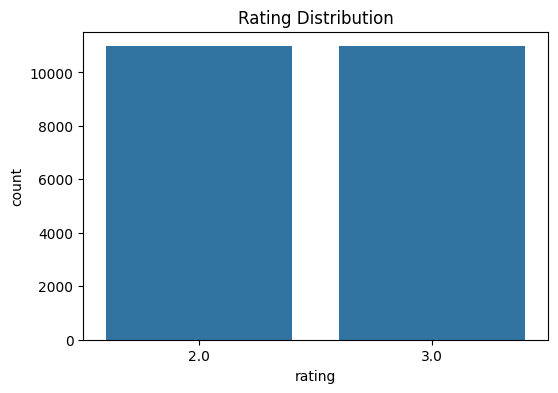

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df_balanced)
plt.title("Rating Distribution")
plt.show()

In [70]:
import os

output_path = "../data/downsampling_data.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_balanced.to_csv(output_path, index=False)